# Problem Statement, Goals, Objective

#### Problem Statement
Semakin banyak variasi penyewaan rumah liburan membuat wisatawan sulit untuk menentukan rumah liburan yang akan mereka sewa.

#### Goals
- Mengetahui tipe ruangan sesuai dengan fasilitas yanng diberikan
- Mengetahui harga rumah sesuai dengan fasilitas yang diberikan
- Mengetahui segmentasi review

#### Objective
Melakukan analisis menggunakan metode klasifikasi, regresi, dan klaster.

#### Referensi
- materi KASDD (lab, tugas)
- dokumentasi library yang digunakan
- https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6
- https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
- https://www.statology.org/remove-outliers-python/
- https://www.statology.org/winsorize/#:~:text=To%20winsorize%20data%20means%20to,value%20at%20the%205th%20percentile.
- https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8
- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://towardsdatascience.com/a-common-mistake-to-avoid-when-encoding-ordinal-features-79e402796ab4
- https://www.geeksforgeeks.org/hyperparameters-of-random-forest-classifier/
- https://realpython.com/k-means-clustering-python/
- https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://parasite.id/blog/2018-12-13-model-evaluation/
- https://towardsdatascience.com/the-best-methods-for-one-hot-encoding-your-data-c29c78a153fd
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
- https://waikato.github.io/weka-blog/posts/2019-02-16-micro_average/
- https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
- https://thinkingneuron.com/how-to-create-the-adaboost-regression-model-in-python/

# Library yang digunakan

In [746]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

# EDA and Data Preprocessing

In [214]:
# read dataset
rent = pd.read_csv('rentholidayhouses.csv')
rent.head()

accommodates  bathrooms  bed_type  bedrooms  beds  \
0             6        2.5  Real Bed       1.0   3.0   
1             2        0.0     Futon       1.0   1.0   
2             2        1.5  Real Bed       1.0   1.0   
3             2        1.5  Real Bed       1.0   1.0   
4             6        2.0  Real Bed       3.0   3.0   

   calculated_host_listings_count cancellation_policy  guests_included  \
0                               1            moderate                1   
1                               1            moderate                1   
2                               2            flexible                1   
3                               2            flexible                1   
4                               2              strict                1   

  has_availability host_is_superhost  ...  maximum_nights number_of_reviews  \
0                t                 f  ...              10                 1   
1                t                 f  ...               7                 0   
2                t                 f  ...            1125                 0   
3                t                 f  ...            1125                 0   
4                t                 f  ...            1125                 0   

   property_type  review_scores_checkin review_scores_communication  \
0          House                   10.0                        10.0   
1      Camper/RV                    NaN                         NaN   
2          House                    NaN                         NaN   
3          House                    NaN                         NaN   
4          House                    NaN                         NaN   

   review_scores_location  review_scores_rating  review_scores_value  \
0                    10.0                 100.0                 10.0   
1                     NaN                   NaN                  NaN   
2                     NaN                   NaN                  NaN   
3                     NaN                   NaN                  NaN   
4                     NaN                   NaN                  NaN   

         room_type     price  
0     Private room  $300.00   
1     Private room   $99.00   
2     Private room  $100.00   
3     Private room  $100.00   
4  Entire home/apt  $599.00   

[5 rows x 22 columns]

### Data Exploration

In [215]:
# shape of dataset
rent.shape

(5834, 22)

`Keterangan`: dataset rent memiliki **5834** baris data serta **22** fitur/kolom

In [216]:
# short information about dataset
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    5834 non-null   int64  
 1   bathrooms                       5788 non-null   float64
 2   bed_type                        5834 non-null   object 
 3   bedrooms                        5828 non-null   float64
 4   beds                            5811 non-null   float64
 5   calculated_host_listings_count  5834 non-null   int64  
 6   cancellation_policy             5834 non-null   object 
 7   guests_included                 5834 non-null   int64  
 8   has_availability                5834 non-null   object 
 9   host_is_superhost               5819 non-null   object 
 10  host_listings_count             5819 non-null   float64
 11  instant_bookable                5834 non-null   object 
 12  maximum_nights                  58

`Keterangan`:
- dataset memiliki **8** fitur nonnumerik dan **14** fitur numerik
- dataset memiliki beberapa fitur yang memiliki *missing value*

In [217]:
# check duplicated data
rent.duplicated().sum()

158

`Keterangan`: dataset memiliki 158 data duplikat

In [218]:
# check missing value
def missval(df):
    cols = df.isna().sum().sort_values(ascending=False)
    percent = cols / len(df)
    missing_data = pd.concat([cols, percent], axis=1, keys=['Total', 'Percentage'])
    return missing_data[missing_data['Total'] > 0]

missval(rent)

Total  Percentage
review_scores_value           2057    0.352588
review_scores_communication   2057    0.352588
review_scores_checkin         2057    0.352588
review_scores_location        2056    0.352417
review_scores_rating          2046    0.350703
bathrooms                       46    0.007885
beds                            23    0.003942
host_is_superhost               15    0.002571
host_listings_count             15    0.002571
bedrooms                         6    0.001028

`Keterangan`: dataset memiliki **10** fitur *missing value* dengan fitur *'review_xxx'* adalah persentase terbesar yaitu lebih dari 35%

In [219]:
# drop duplicated value
rent_no_dupl = rent.drop_duplicates()
rent_no_dupl.duplicated().sum()

0

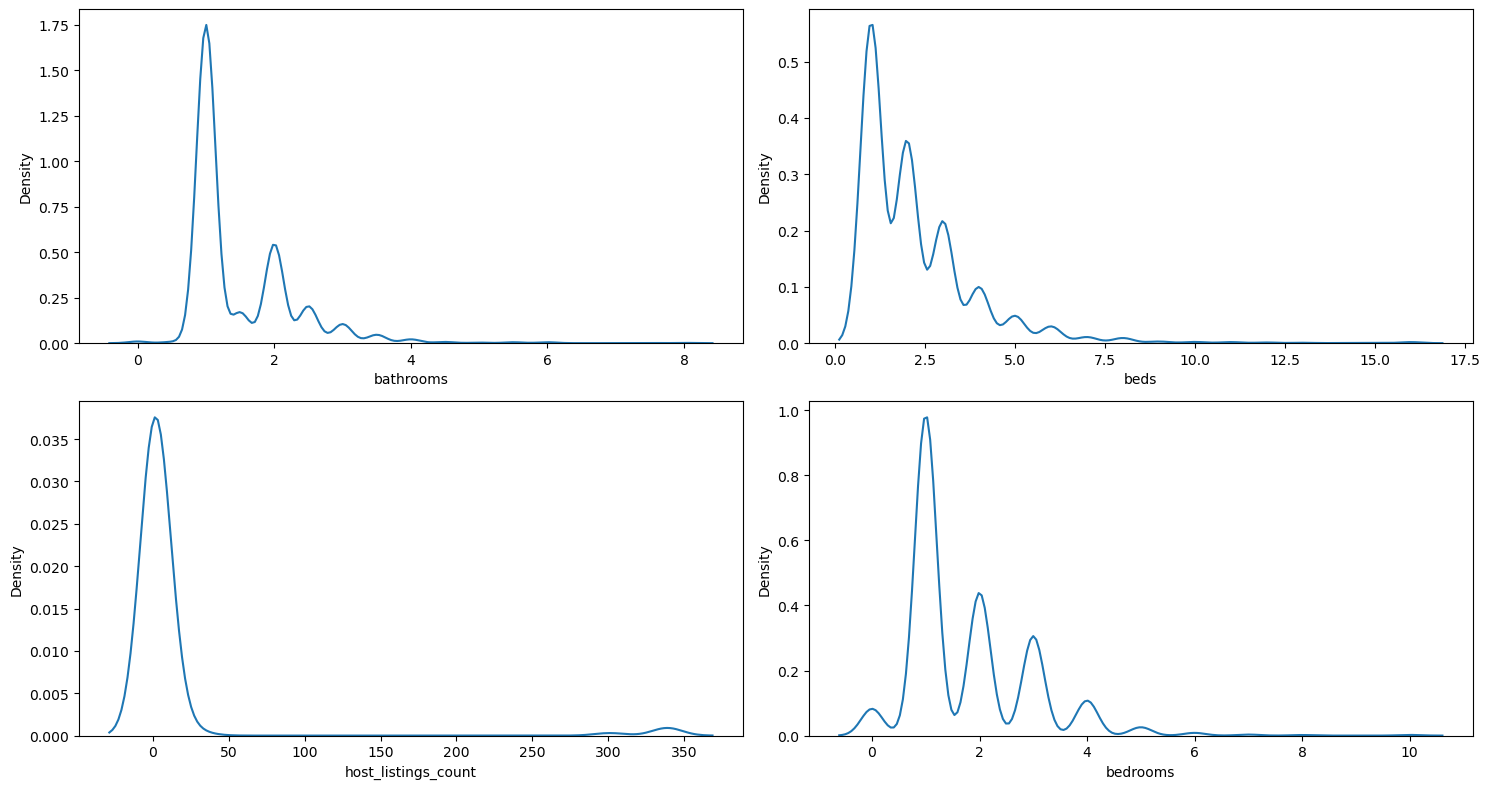

In [220]:
# fill missing value based on data distribution
list_na = ['bathrooms', 'beds', 'host_listings_count', 'bedrooms']

plt.figure(figsize=(15, 8))
for i in range(len(list_na)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=rent_no_dupl, x=rent_no_dupl[list_na[i]])
    plt.tight_layout()

In [221]:
for col in list_na:
    rent_no_dupl[col] = rent_no_dupl[col].fillna(rent_no_dupl[col].median())

rent_no_dupl['host_is_superhost'] = rent_no_dupl['host_is_superhost'].fillna(rent_no_dupl['host_is_superhost'].mode()[0])

`Keterangan`: karena data terdistribusi secara multimodal dan skewed maka *missing value* akan diisi dengan median sedangkan data kategori akan diisi dengan modusnya

In [222]:
# check dataset after missing value is filled
missval(rent_no_dupl)

Total  Percentage
review_scores_value           1904    0.335447
review_scores_communication   1904    0.335447
review_scores_checkin         1904    0.335447
review_scores_location        1903    0.335271
review_scores_rating          1893    0.333510

In [223]:
# drop the rows of missing value
rent_no_dupl = rent_no_dupl.dropna()
rent_no_dupl.shape

(3763, 22)

`Keterangan`: baris-baris yang memiliki *missing value* akan dihapus karena kolom tersebut berhubungan dengan review yang menyangkut kolom lain sehingga proses imputasi sulit dilakukan, selain itu dataset ini memiliki data yang cukup banyak untuk melakukan proses selanjutnya

In [224]:
# check the suitability of the data
def size(df, col):
    return df.groupby(col).size()
for col in rent_no_dupl.columns:
    print("KOLOM")
    print(size(rent_no_dupl, col))
    print("-------------------------------")

KOLOM
accommodates
1       97
2     1179
3      361
4      750
5      220
6      537
7       80
8      247
9       37
10     137
11      16
12      47
13       4
14      15
15      10
16      26
dtype: int64
-------------------------------
KOLOM
bathrooms
0.0      10
0.5       4
1.0    2418
1.5     220
2.0     663
2.5     228
3.0     130
3.5      50
4.0      23
4.5       6
5.0       3
5.5       3
6.0       4
7.0       1
dtype: int64
-------------------------------
KOLOM
bed_type
Airbed             46
Couch              15
Futon              54
Pull-out Sofa      16
Real Bed         3632
dtype: int64
-------------------------------
KOLOM
bedrooms
0.0      185
1.0     1954
2.0      801
3.0      550
4.0      200
5.0       45
6.0       15
7.0        6
8.0        3
10.0       4
dtype: int64
-------------------------------
KOLOM
beds
1.0     1635
2.0      953
3.0      574
4.0      267
5.0      144
6.0       88
7.0       39
8.0       31
9.0        7
10.0       8
11.0       4
12.0       5
13.0

`Keterangan`:
- dataset memiliki fitur yang skalanya tidak sesuai seperti bathrooms dan review_scores_rating, ada beberapa fitur lain yang memiliki tipe data kurang sesuai seperti bathrooms/bedrooms/beds/host_listings_count, ada fitur yang tidak digunakan yaitu has_availability karena hanya memiliki 1 nilai, dan ada penulisan yang tidak sesuai yaitu price

In [225]:
rent_no_dupl = rent_no_dupl.drop('has_availability', axis=1)

In [226]:
rent_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 0 to 5830
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    3763 non-null   int64  
 1   bathrooms                       3763 non-null   float64
 2   bed_type                        3763 non-null   object 
 3   bedrooms                        3763 non-null   float64
 4   beds                            3763 non-null   float64
 5   calculated_host_listings_count  3763 non-null   int64  
 6   cancellation_policy             3763 non-null   object 
 7   guests_included                 3763 non-null   int64  
 8   host_is_superhost               3763 non-null   object 
 9   host_listings_count             3763 non-null   float64
 10  instant_bookable                3763 non-null   object 
 11  maximum_nights                  3763 non-null   int64  
 12  number_of_reviews               37

In [227]:
# change data input
rent_no_dupl['bathrooms'] = rent_no_dupl['bathrooms'].replace({0.5:1.0, 1.5:2.0, 3.5:4.0, 4.5:5.0, 5.5:6.0, 7.5:8.0})
rent_no_dupl['host_is_superhost'] = rent_no_dupl['host_is_superhost'].replace({'f':'0', 't':'1'})
rent_no_dupl['instant_bookable'] = rent_no_dupl['instant_bookable'].replace({'f':'0', 't':'1'})
rent_no_dupl['review_scores_rating'] = rent_no_dupl['review_scores_rating']/10
rent_no_dupl['price'] = rent_no_dupl['price'].replace('[\$,]', '', regex=True).astype(float)

In [228]:
# change appropriate data types
rent_no_dupl['bathrooms'] = rent_no_dupl['bathrooms'].astype('int64')
rent_no_dupl['bedrooms'] = rent_no_dupl['bedrooms'].astype('int64')
rent_no_dupl['host_is_superhost'] = rent_no_dupl['host_is_superhost'].astype('int64')
rent_no_dupl['instant_bookable'] = rent_no_dupl['instant_bookable'].astype('int64')
rent_no_dupl['beds'] = rent_no_dupl['beds'].astype('int64')
rent_no_dupl['host_listings_count'] = rent_no_dupl['host_listings_count'].astype('int64')

In [229]:
rent_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 0 to 5830
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    3763 non-null   int64  
 1   bathrooms                       3763 non-null   int64  
 2   bed_type                        3763 non-null   object 
 3   bedrooms                        3763 non-null   int64  
 4   beds                            3763 non-null   int64  
 5   calculated_host_listings_count  3763 non-null   int64  
 6   cancellation_policy             3763 non-null   object 
 7   guests_included                 3763 non-null   int64  
 8   host_is_superhost               3763 non-null   int64  
 9   host_listings_count             3763 non-null   int64  
 10  instant_bookable                3763 non-null   int64  
 11  maximum_nights                  3763 non-null   int64  
 12  number_of_reviews               37

In [230]:
# descriptive statistic for numeric data
rent_no_dupl.describe()

accommodates    bathrooms     bedrooms         beds  \
count   3763.000000  3763.000000  3763.000000  3763.000000   
mean       4.429179     1.440340     1.707946     2.250332   
std        2.763199     0.715024     1.139176     1.702344   
min        1.000000     0.000000     0.000000     1.000000   
25%        2.000000     1.000000     1.000000     1.000000   
50%        4.000000     1.000000     1.000000     2.000000   
75%        6.000000     2.000000     2.000000     3.000000   
max       16.000000     7.000000    10.000000    16.000000   

       calculated_host_listings_count  guests_included  host_is_superhost  \
count                     3763.000000      3763.000000        3763.000000   
mean                         2.141642         2.064576           0.201967   
std                          2.574850         1.861592           0.401521   
min                          1.000000         0.000000           0.000000   
25%                          1.000000         1.000000           0.000000   
50%                          1.000000         1.000000           0.000000   
75%                          2.000000         2.000000           0.000000   
max                         17.000000        16.000000           1.000000   

       host_listings_count  instant_bookable  maximum_nights  \
count          3763.000000       3763.000000     3763.000000   
mean             14.514217          0.109753      704.449110   
std              62.266845          0.312623      708.012818   
min               1.000000          0.000000        1.000000   
25%               1.000000          0.000000       30.000000   
50%               1.000000          0.000000     1125.000000   
75%               2.000000          0.000000     1125.000000   
max             339.000000          1.000000    26801.000000   

       number_of_reviews  review_scores_checkin  review_scores_communication  \
count        3763.000000            3763.000000                  3763.000000   
mean           16.715121               9.830189                     9.838427   
std            30.035893               0.554928                     0.564727   
min             1.000000               2.000000                     2.000000   
25%             2.000000              10.000000                    10.000000   
50%             6.000000              10.000000                    10.000000   
75%            17.000000              10.000000                    10.000000   
max           314.000000              10.000000                    10.000000   

       review_scores_location  review_scores_rating  review_scores_value  \
count             3763.000000           3763.000000          3763.000000   
mean                 9.467446              9.541483             9.415094   
std                  0.833375              0.726760             0.893539   
min                  4.000000              2.000000             2.000000   
25%                  9.000000              9.300000             9.000000   
50%                 10.000000              9.800000            10.000000   
75%                 10.000000             10.000000            10.000000   
max                 10.000000             10.000000            10.000000   

             price  
count  3763.000000  
mean    223.973691  
std     254.736735  
min      14.000000  
25%      85.000000  
50%     149.000000  
75%     250.000000  
max    2549.000000

In [231]:
# descriptive statistic for non-numeric data
rent_no_dupl.describe(include=object)

bed_type cancellation_policy property_type        room_type
count       3763                3763          3763             3763
unique         5                   5            18                3
top     Real Bed              strict         House  Entire home/apt
freq        3632                1805          2353             2681

`Keterangan`:
- terdapat beberapa fitur yang diasumsikan terdistribusi normal karena memiliki perbedaan mean dan median yang tidak terlalu jauh, yaitu *accommodates, bathrooms, bedrooms, beds, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_rating, review_scores_value*
- data non-numerik memiliki beberapa data terbanyak yaitu, real bed untuk tipe kasur; strict untuk kebijakan pembatalan; house untuk tipe properti; dan entire home/apt untuk tipe ruangan

### Univariate Analysis

In [232]:
# split numerical and categorical columns
list_num = [cols for cols in rent_no_dupl.select_dtypes(np.number).columns]
list_cat = [cols for cols in rent_no_dupl.select_dtypes(object).columns]

In [243]:
# split data to handle outliers based on described result
skewed = ['calculated_host_listings_count', 'guests_included', 'host_listings_count', 'maximum_nights', 'number_of_reviews','price']
normal = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_is_superhost', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'instant_bookable']
cat_and_skewed = skewed + list_cat

`Keterangan`: berdasarkan hasil 'describe' di atas, fitur dapat dibagi menjadi fitur skewed dan normal sehingga dapat digunakan untuk mengatasi outliers dengan metode yang berbeda

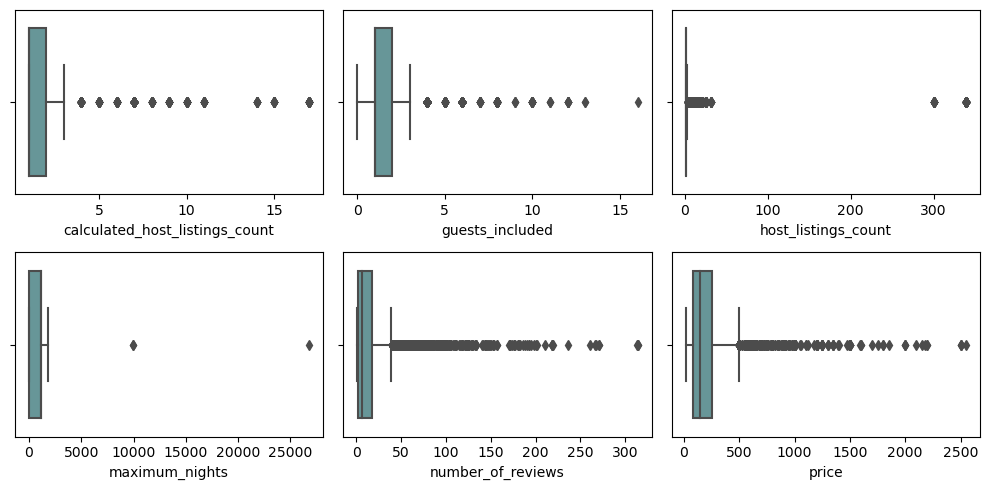

In [244]:
# check skewed outliers using boxplot
plt.figure(figsize=(10, 5))
for i in range(len(skewed)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=rent_no_dupl[skewed[i]], color='cadetblue')
    plt.tight_layout()

In [245]:
# find the number of outliers using iqr
def get_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    return lower, upper

outliers = (rent_no_dupl[skewed] < get_outlier(rent_no_dupl[skewed])[0]) | (rent_no_dupl[skewed] > get_outlier(rent_no_dupl[skewed])[1])
print("The number of outliers:")
print(outliers.sum())

The number of outliers:
calculated_host_listings_count    508
guests_included                   704
host_listings_count               628
maximum_nights                      3
number_of_reviews                 419
price                             383
dtype: int64


In [295]:
# transform skewed data using log transformation
rent_no_skew = rent_no_dupl.copy()
for col in skewed:
    if min(rent_no_skew[col]) == 0:
        rent_no_skew[col] = np.log1p(rent_no_skew[col])
    else:
        rent_no_skew[col] = np.log(rent_no_skew[col])

In [296]:
# handle outliers using z-score for normal data
test = rent_no_skew[normal]
z = np.abs(zscore(test))
tmp = test[(z>3)]
tmp.count()

accommodates                    55
bathrooms                       90
bedrooms                        28
beds                            63
host_is_superhost                0
review_scores_checkin          115
review_scores_communication    103
review_scores_location          63
review_scores_rating            48
review_scores_value             68
instant_bookable                 0
dtype: int64

In [297]:
tmp2 = test[(z<3).all(axis=1)]
tmp2_outlier = tmp2[(z>3)]
tmp2_outlier.count()

accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
host_is_superhost              0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
instant_bookable               0
dtype: int64

In [298]:
# merge dataframe
rent_no_normal = rent_no_skew[cat_and_skewed]
rent_final = tmp2.join(rent_no_normal)

In [299]:
rent_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 0 to 5830
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    3396 non-null   int64  
 1   bathrooms                       3396 non-null   int64  
 2   bedrooms                        3396 non-null   int64  
 3   beds                            3396 non-null   int64  
 4   host_is_superhost               3396 non-null   int64  
 5   review_scores_checkin           3396 non-null   float64
 6   review_scores_communication     3396 non-null   float64
 7   review_scores_location          3396 non-null   float64
 8   review_scores_rating            3396 non-null   float64
 9   review_scores_value             3396 non-null   float64
 10  instant_bookable                3396 non-null   int64  
 11  calculated_host_listings_count  3396 non-null   float64
 12  guests_included                 33

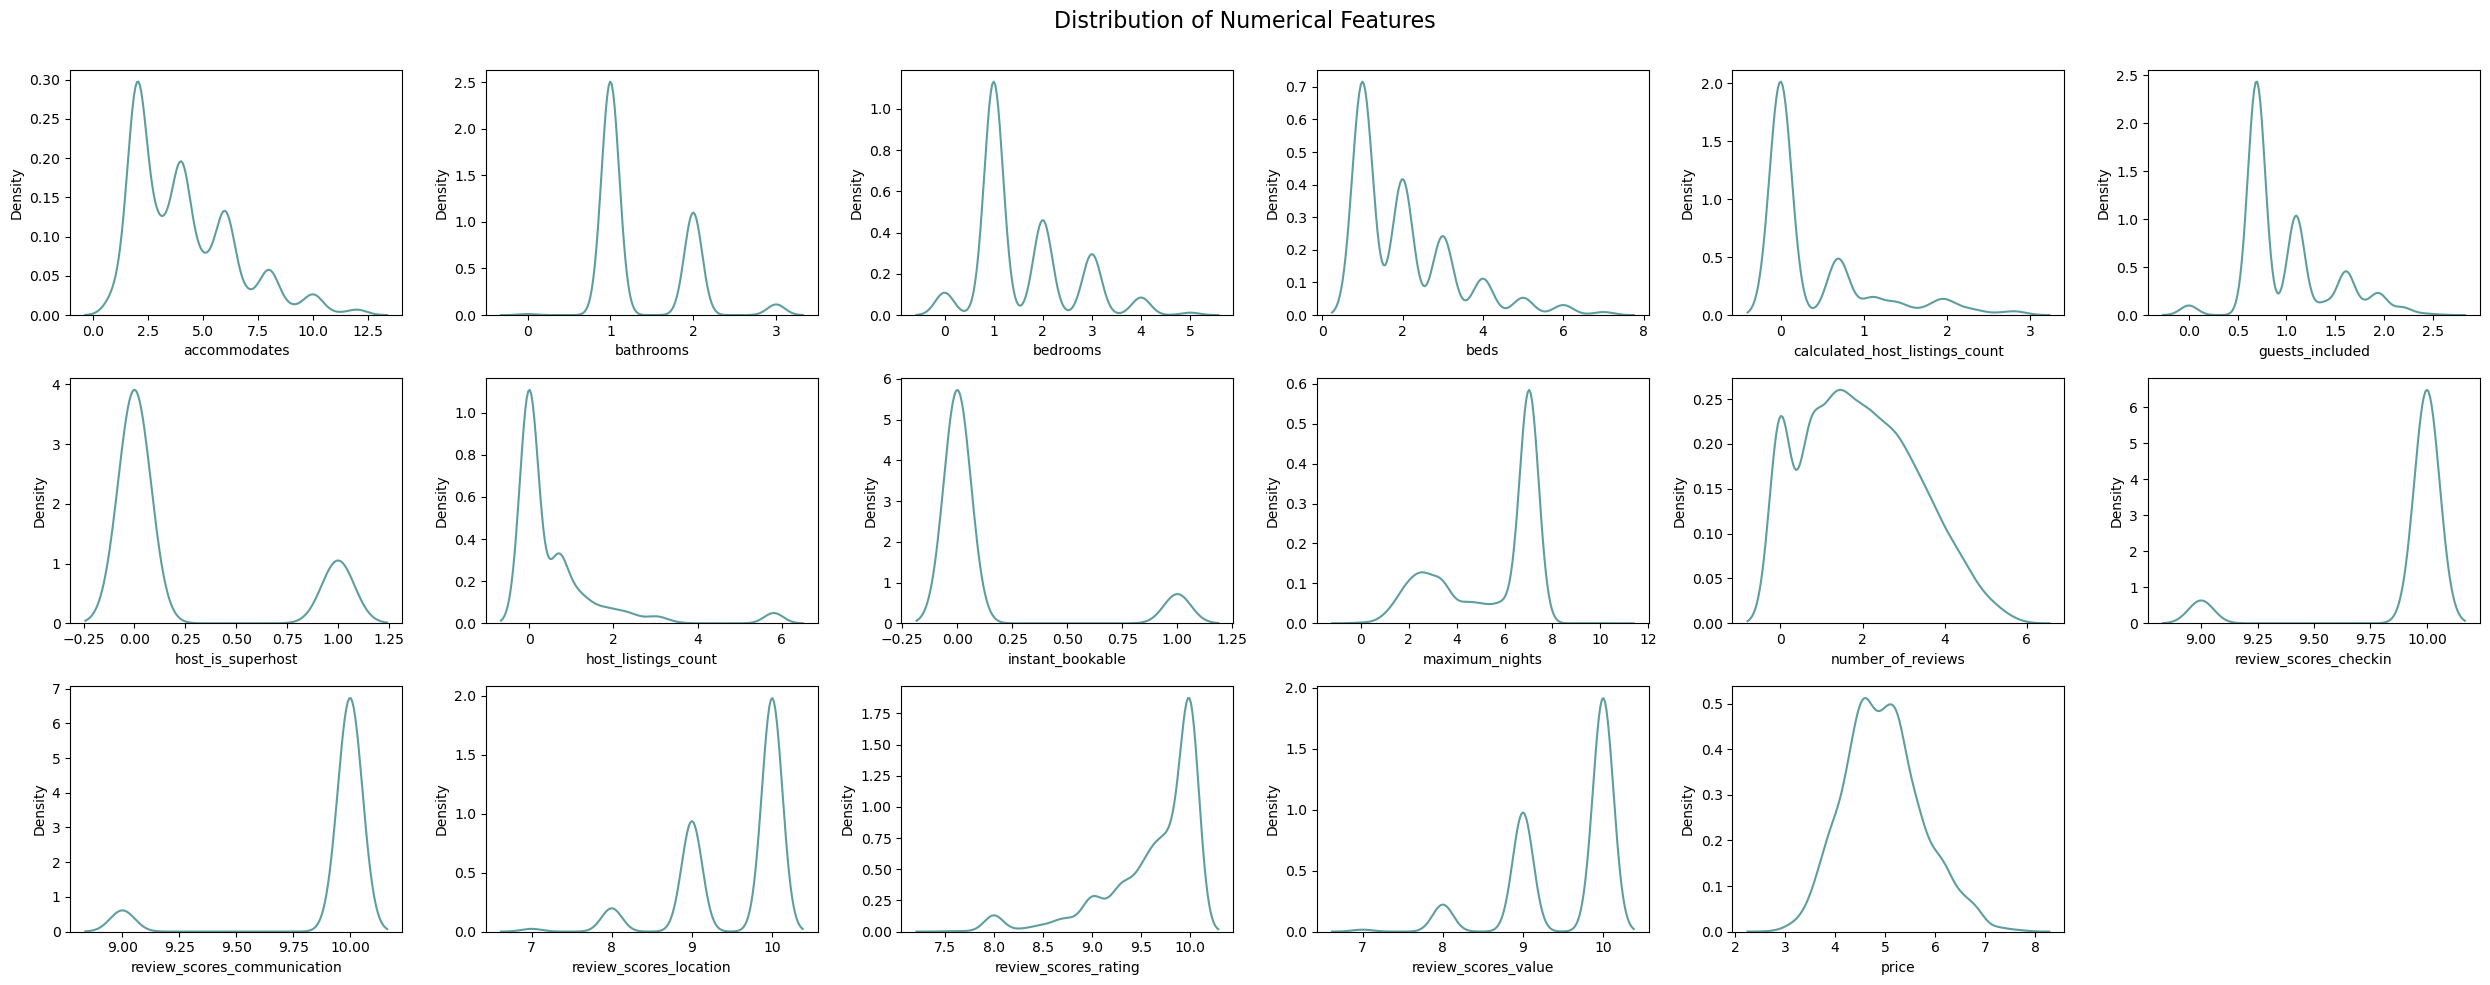

In [300]:
# perform distplot for numerical columns
plt.figure(figsize=(25, 10))
for i in range(0, len(list_num)):
    plt.subplot(3, 6, i+1)
    sns.kdeplot(rent_final[list_num[i]], color='cadetblue')
    plt.suptitle('Distribution of Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

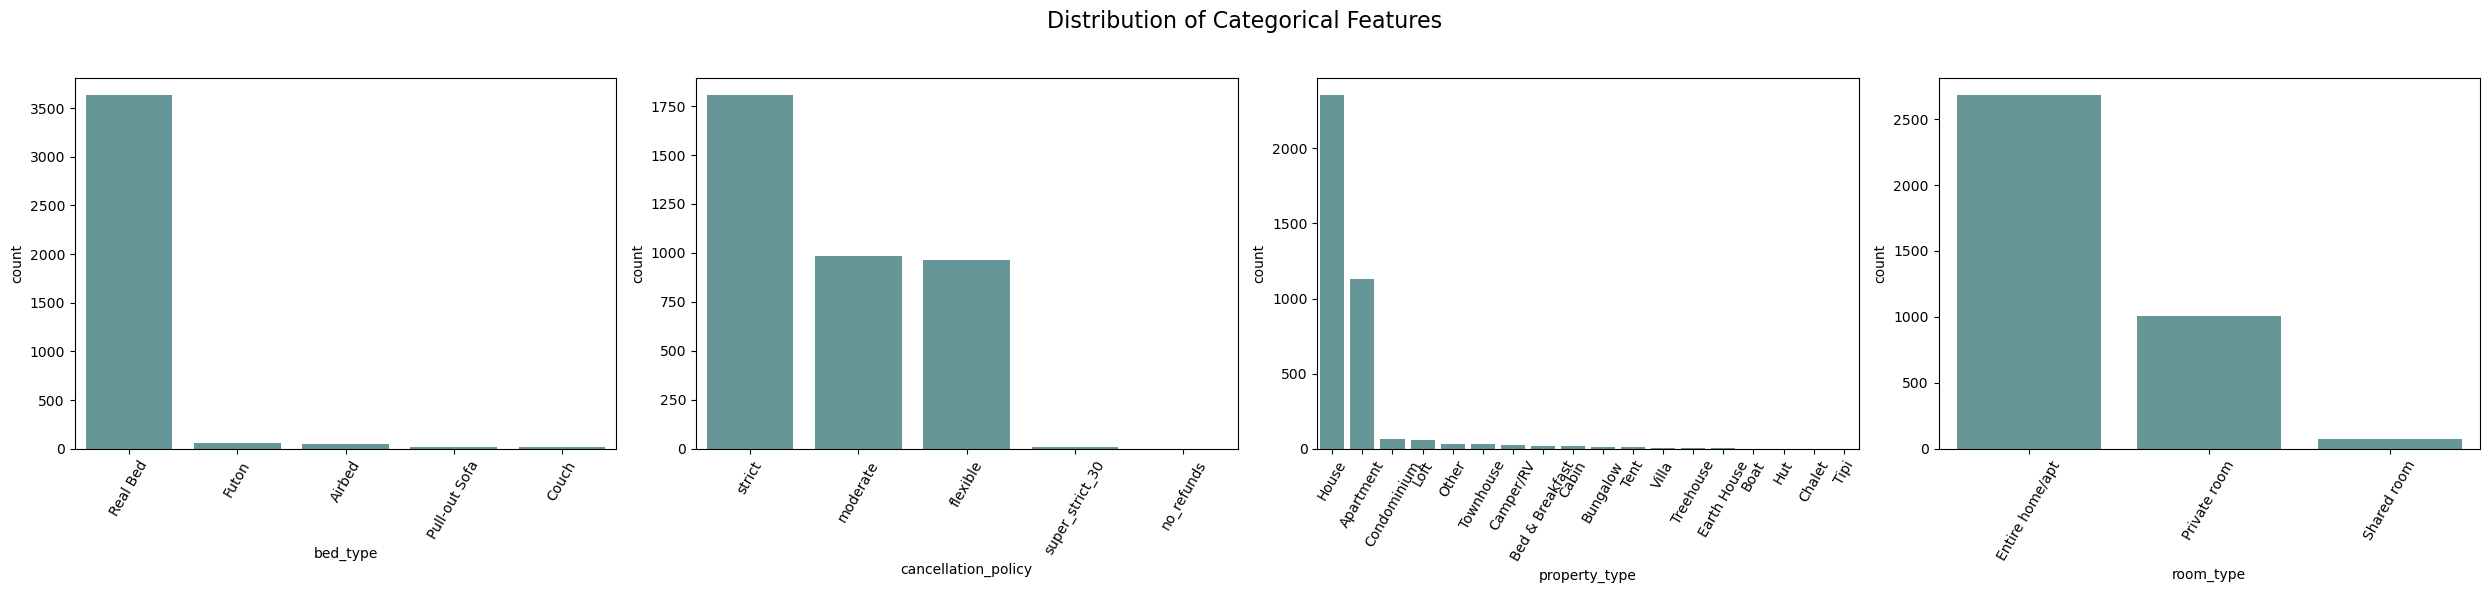

In [301]:
# perform countplot for categorical columns
plt.figure(figsize=(25, 6))
for i in range(0, len(list_cat)):
    plt.subplot(1,4,i+1)
    sns.countplot(x=rent_no_dupl[list_cat[i]], color='cadetblue', order = rent_no_dupl[list_cat[i]].value_counts().index)
    plt.suptitle('Distribution of Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)
plt.show()

### Bivariate Analysis

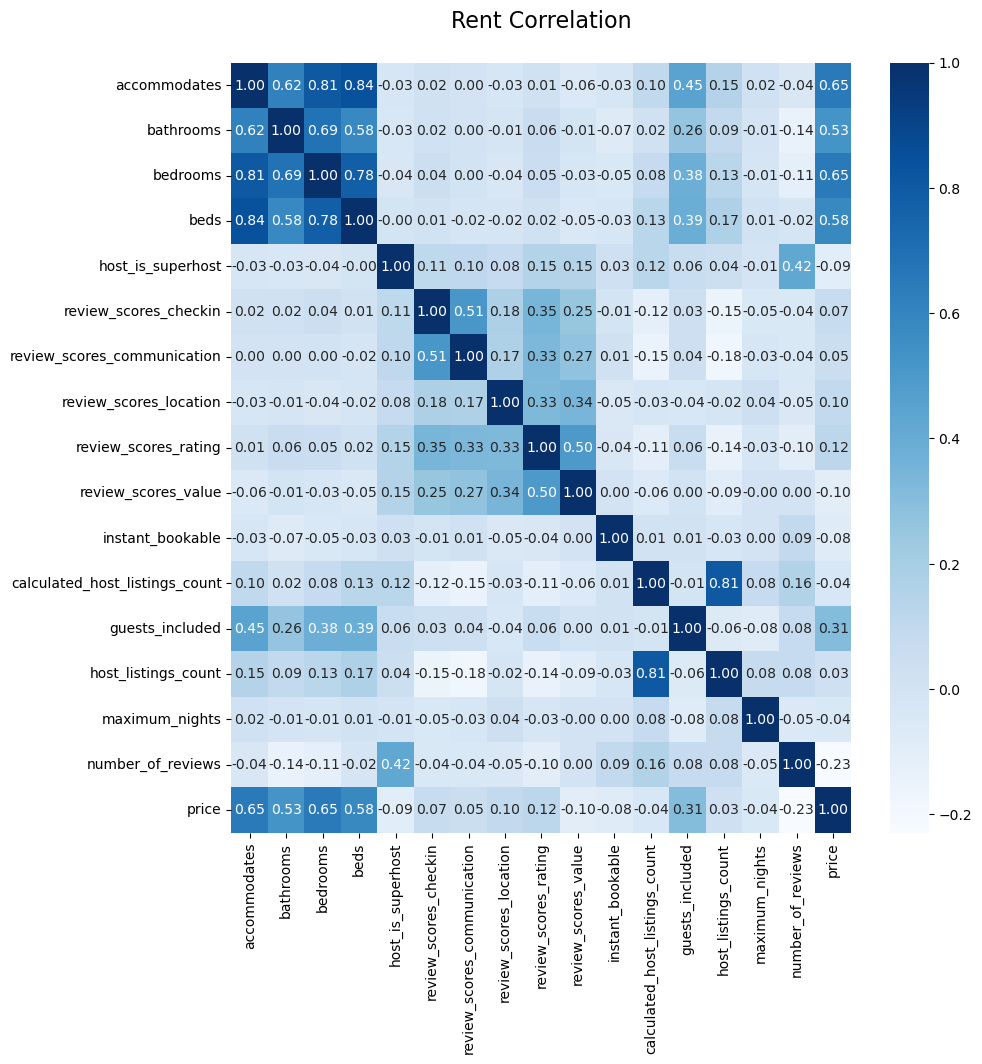

In [302]:
# perform heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(rent_final.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Rent Correlation\n', fontsize=16)
plt.show()

`Keterangan`: berdasarkan heatmap, fitur-fitur yang memiliki korelasi tinggi dengan price adalah accomodates, bathrooms, bedrooms, beds, dan guests_included

<Figure size 1500x1500 with 0 Axes>

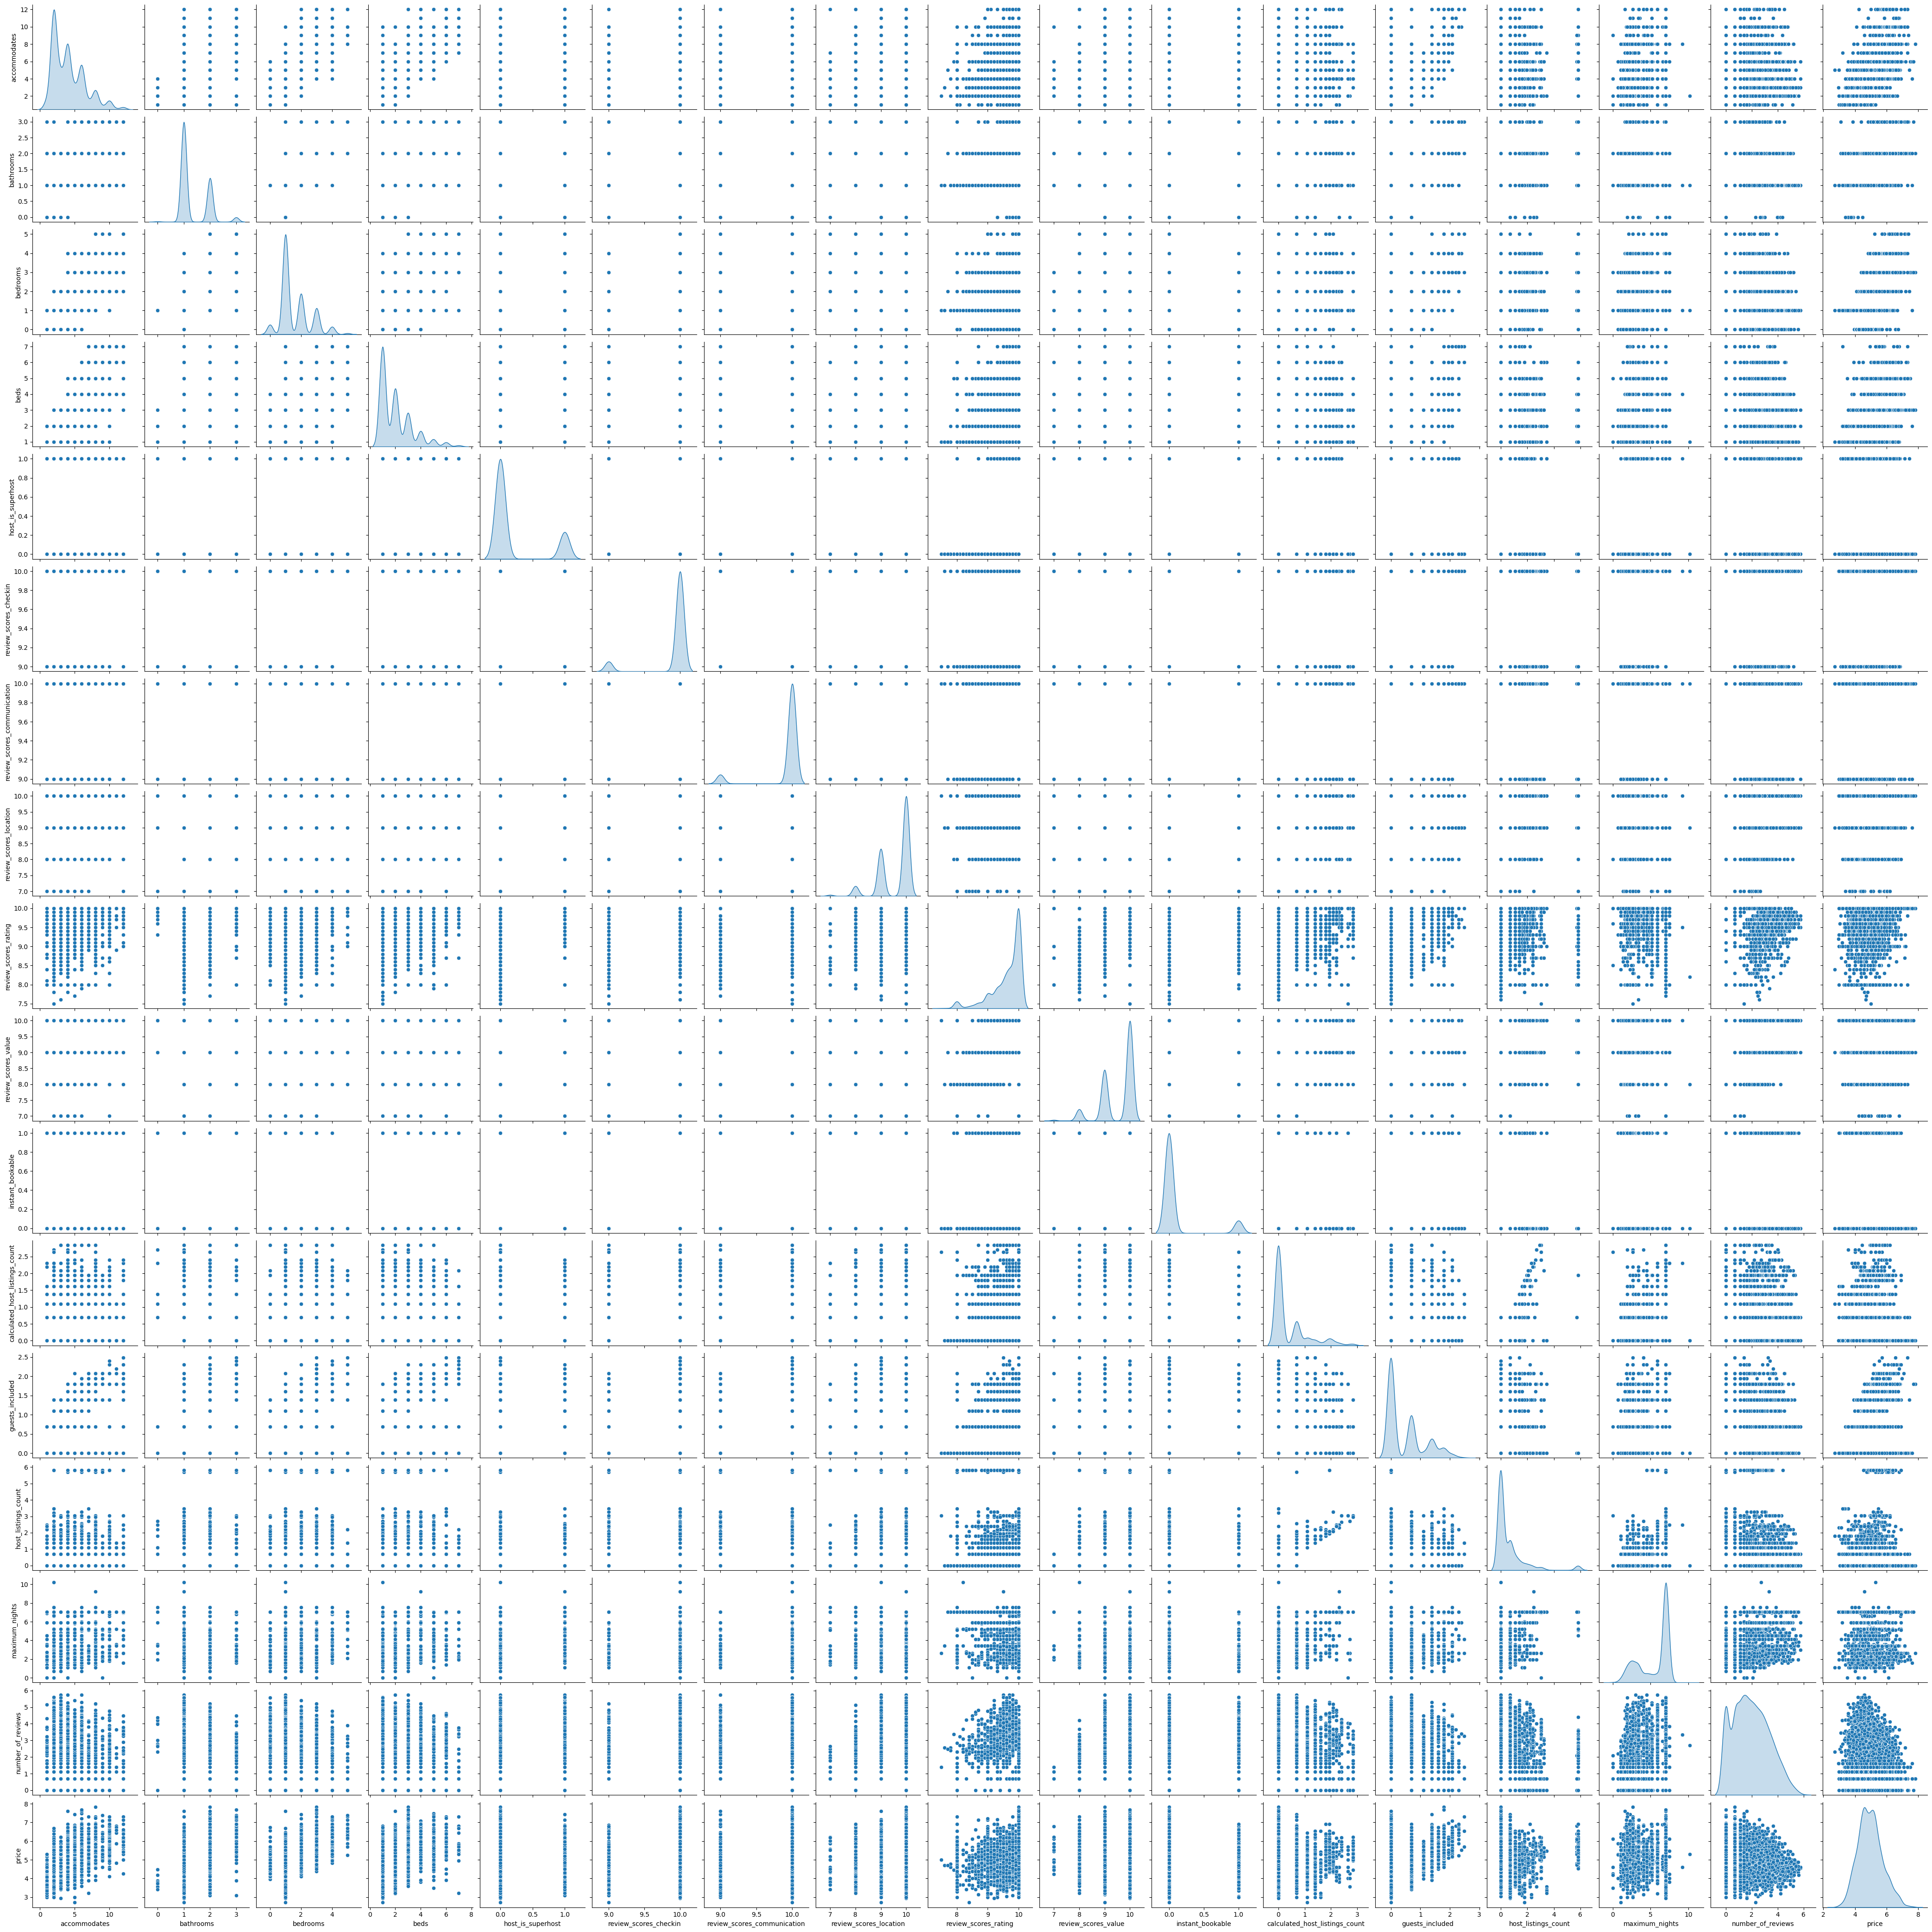

In [266]:
# perform pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(rent_final, diag_kind='kde')
plt.show()

### Insights

In [303]:
# nomor 1a: Bagaimana karakteristik akomodasi dengan rata-rata semua review yang paling rendah?
review = ['review_scores_checkin','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value']
akomodasi = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'maximum_nights','bed_type', 'cancellation_policy', 'host_is_superhost', 'instant_bookable', 'property_type', 'room_type']

In [304]:
akomodasi_rate = rent_final.groupby(akomodasi)[review].mean().reset_index().sort_values(by=review)
akomodasi_rate.head()

accommodates  bathrooms  bedrooms  beds  guests_included  \
818              3          1         1     1         1.098612   
1408             4          2         2     2         0.693147   
394              2          1         1     1         1.098612   
1073             4          1         1     1         1.609438   
1689             6          1         1     5         0.693147   

      maximum_nights  bed_type cancellation_policy  host_is_superhost  \
818         7.025538  Real Bed            moderate                  0   
1408        5.247024  Real Bed              strict                  0   
394         1.386294  Real Bed            moderate                  0   
1073        1.791759  Real Bed            moderate                  0   
1689        7.025538  Real Bed              strict                  0   

      instant_bookable property_type        room_type  review_scores_checkin  \
818                  0         House  Entire home/apt                    9.0   
1408                 0         House  Entire home/apt                    9.0   
394                  0         House     Private room                    9.0   
1073                 0     Apartment  Entire home/apt                    9.0   
1689                 1         House  Entire home/apt                    9.0   

      review_scores_communication  review_scores_location  \
818                           9.0                     7.0   
1408                          9.0                     7.0   
394                           9.0                     7.0   
1073                          9.0                     7.0   
1689                          9.0                     8.0   

      review_scores_rating  review_scores_value  
818                    8.0                  7.0  
1408                   8.3                  8.0  
394                    8.6                  8.0  
1073                   8.7                  9.0  
1689                   7.9                  8.0

In [305]:
# nomor 1b: Apa saja fasilitas yang diberikan oleh akomodasi dengan harga paling mahal?
fasilitas_rate = rent_final[rent_final['price'] == rent_final['price'].max()]
fasilitas_rate[list_num]

accommodates  bathrooms  bedrooms  beds  calculated_host_listings_count  \
1983             8          2         3     3                             0.0   

      guests_included  host_is_superhost  host_listings_count  \
1983          1.94591                  0                  0.0   

      instant_bookable  maximum_nights  number_of_reviews  \
1983                 0        2.639057           0.693147   

      review_scores_checkin  review_scores_communication  \
1983                   10.0                         10.0   

      review_scores_location  review_scores_rating  review_scores_value  \
1983                    10.0                  10.0                  9.0   

         price  
1983  7.824046

In [306]:
fasilitas_rate[list_cat]

bed_type cancellation_policy property_type        room_type
1983  Real Bed              strict         House  Entire home/apt

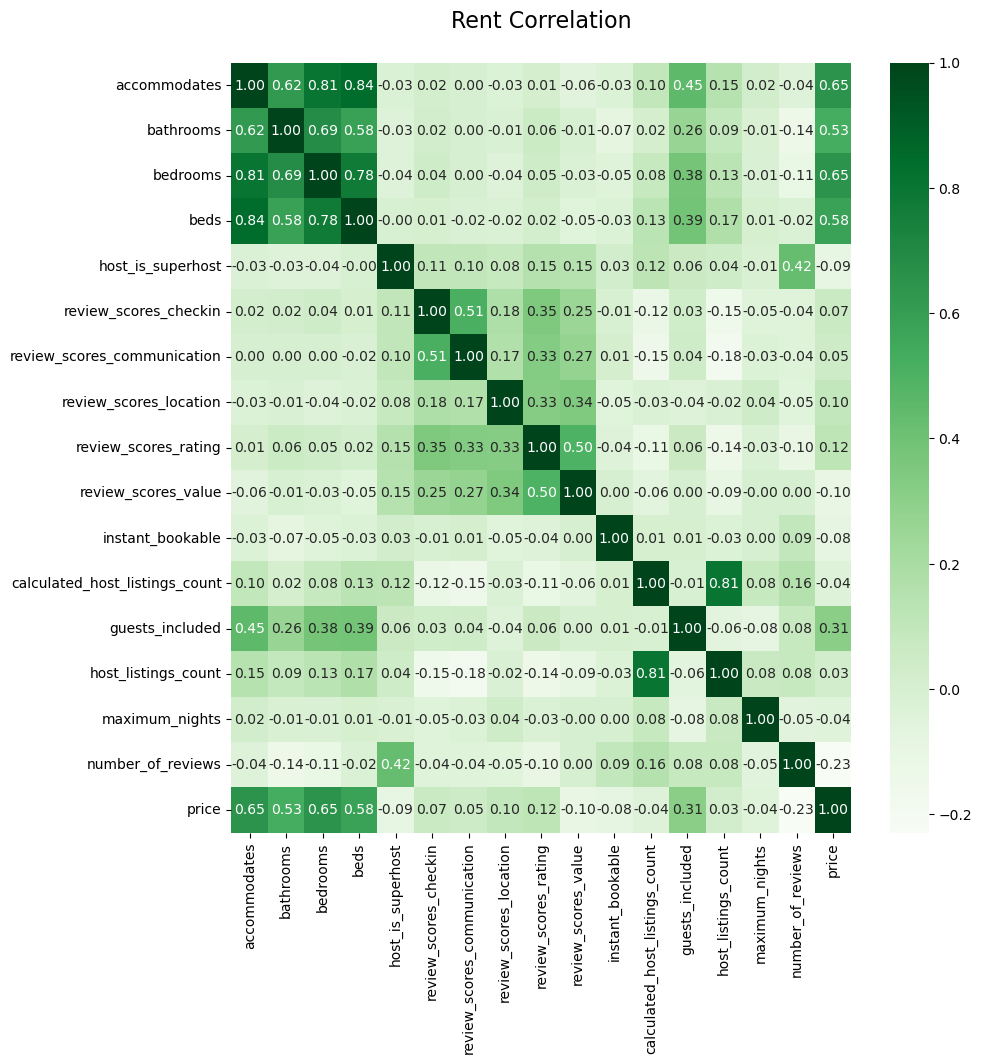

In [307]:
# nomor 1c: Bagaimana hubungan antara fitur harga dengan fitur lainnya? Apakah terhadap hubungan dengan fitur jumlah review?
plt.figure(figsize=(10, 10))
sns.heatmap(rent_final.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.title('Rent Correlation\n', fontsize=16)
plt.show()

In [308]:
# nomor 1d: Sebutkan 3 tipe properti dengan host listing terbanyak beserta jumlahnya!
properti_rate = rent_final.groupby('property_type').agg({'host_listings_count':'count'}).reset_index().sort_values(by='host_listings_count',ascending=False)
properti_rate

property_type  host_listings_count
9             House                 2097
0         Apartment                 1045
7       Condominium                   63
11             Loft                   56
12            Other                   30
15        Townhouse                   25
5         Camper/RV                   23
1   Bed & Breakfast                   20
4             Cabin                   13
3          Bungalow                   10
17            Villa                    4
8       Earth House                    2
13             Tent                    2
16        Treehouse                    2
2              Boat                    1
6            Chalet                    1
10              Hut                    1
14             Tipi                    1

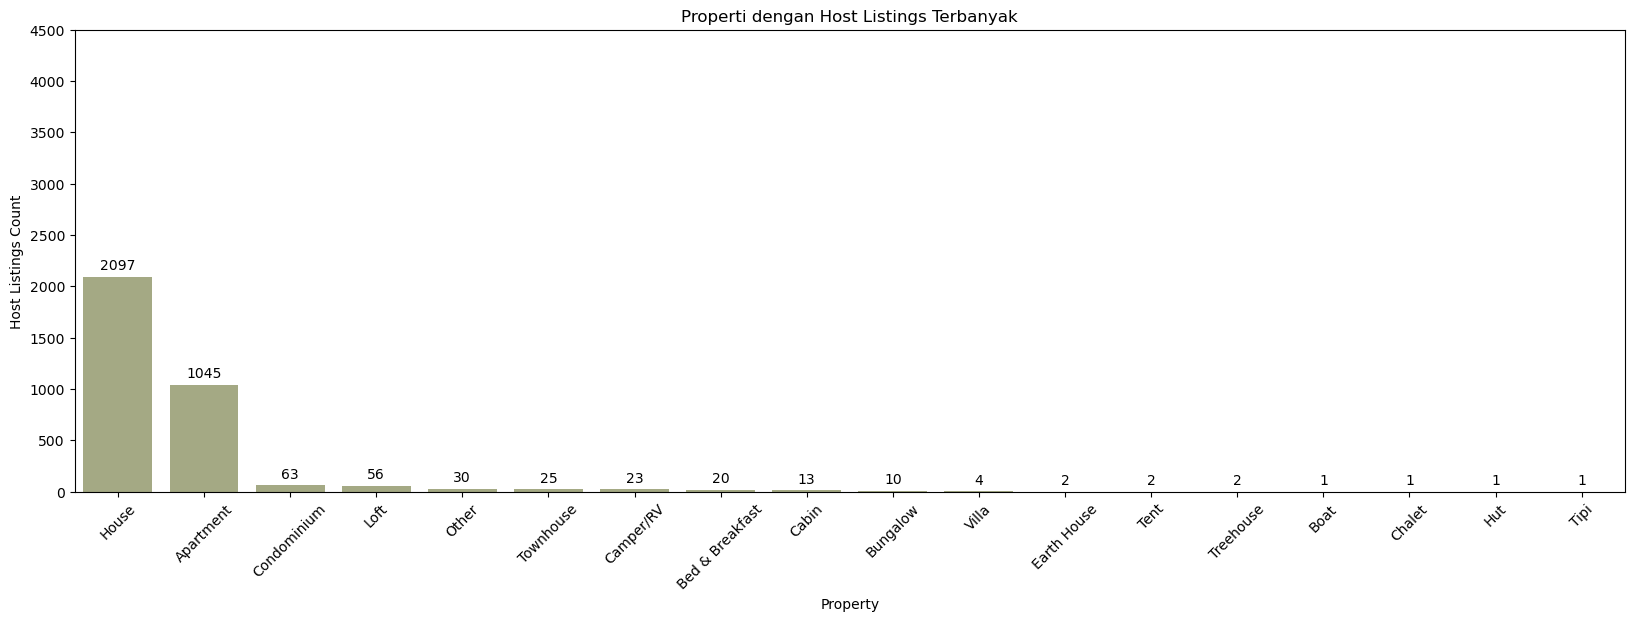

In [309]:
plt.figure(figsize=(20,6))
plots = sns.barplot(x=properti_rate['property_type'],
                    y=properti_rate['host_listings_count'],
                    data=properti_rate, color="#A9AF7E")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Properti dengan Host Listings Terbanyak')
plt.xlabel('Property')
plt.ylabel('Host Listings Count')
plt.xticks(rotation=45)
plt.ylim(0, 4500)
plt.savefig('nomor1d.png')
plt.show()

In [310]:
# nomor 1e: Jumlah kamar tidur yang memiliki semua review tertinggi?
bedrooms_rate = rent_final.groupby('bedrooms')[review].mean().reset_index().sort_values(by=review, ascending=True)
bedrooms_rate.head(1)

bedrooms  review_scores_checkin  review_scores_communication  \
1         1               9.902505                     9.910131   

   review_scores_location  review_scores_rating  review_scores_value  
1                9.557734              9.604139             9.553377

In [311]:
# nomor 1f: Harga rumah yang memiliki rating value terendah?
price_rate = rent_final.groupby('price')['review_scores_value'].mean().sort_values().reset_index()
price_rate = np.exp(price_rate)
price_rate.head(1)

price  review_scores_value
0  890.0          1096.633158

# Modelling

## 2a. Classification

#### Encoding

In [312]:
list_cat2 = ['bed_type','instant_bookable','property_type','room_type']
rent_clf = rent_final.copy()

In [313]:
# replace super_strict_30 to strict
rent_clf['cancellation_policy'] = rent_no_dupl['cancellation_policy'].replace('super_strict_30', 'strict')
rent_clf['cancellation_policy'].value_counts()

strict      1596
moderate     916
flexible     884
Name: cancellation_policy, dtype: int64

In [314]:
# label encoding for target
le_clf = LabelEncoder()
rent_clf['cancellation_policy'] = le_clf.fit_transform(rent_clf['cancellation_policy'])
rent_clf['cancellation_policy'].value_counts()

2    1596
1     916
0     884
Name: cancellation_policy, dtype: int64

In [315]:
# one hot encoding for features
for i in list_cat2:
    ohe = pd.get_dummies(rent_clf[i], prefix=i, drop_first=True)
    rent_clf = rent_clf.join(ohe)
rent_clf = rent_clf.drop(list_cat2, axis=1)

#### Feature  Selection

In [345]:
# split feature and target
X_clf = rent_clf.drop(['cancellation_policy','price'], axis=1)
y_clf = rent_clf['cancellation_policy']

In [356]:
# feature selection using select k best
selector_clf = SelectKBest(chi2, k=5)
X_clf_new = selector_clf.fit_transform(X_clf, y_clf)

In [357]:
selector_clf.get_feature_names_out()

array(['accommodates', 'beds', 'calculated_host_listings_count',
       'host_listings_count', 'room_type_Private room'], dtype=object)

In [358]:
# split train test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_new, y_clf, test_size=0.2, random_state=42)

In [360]:
# evaluation
def eval(ytest, ypred, ytrain, ytrainpred):
    print('Accuracy (train)\t:', accuracy_score(ytest, ypred))
    print('Accuracy (test)\t\t:', accuracy_score(ytrain, ytrainpred))
    print()
    print('Further information:')
    print(classification_report(ytest, ypred, digits=3))

### KNN Classifier

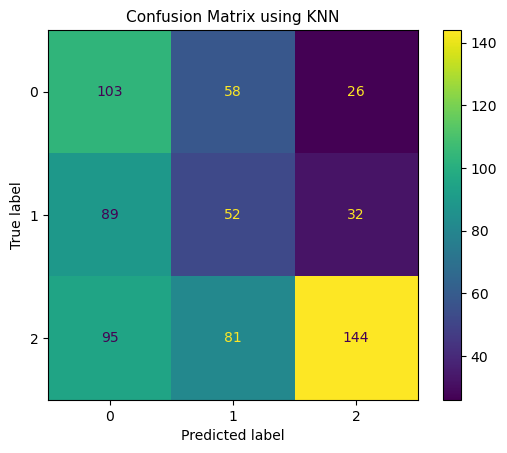

In [361]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train_clf, y_train_clf)

# predict knn
knn_predict_train = knn.predict(X_train_clf)
knn_predict = knn.predict(X_test_clf)

# confusion matrix for decision tree classifier
cm = confusion_matrix(y_test_clf, knn_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix using KNN', fontsize=11)
plt.show()

In [363]:
# evaluation metrics for knn classifier
eval(y_test_clf, knn_predict, y_train_clf, knn_predict_train)

Accuracy (train)	: 0.43970588235294117
Accuracy (test)		: 0.49410898379970547

Further information:
              precision    recall  f1-score   support

           0      0.359     0.551     0.435       187
           1      0.272     0.301     0.286       173
           2      0.713     0.450     0.552       320

    accuracy                          0.440       680
   macro avg      0.448     0.434     0.424       680
weighted avg      0.503     0.440     0.452       680



In [371]:
# optimization knn with gridsearch cv
knn_model = KNeighborsClassifier()
knn_params = [{'n_neighbors': range(5,20)}]
knnclf = GridSearchCV(knn_model,
                      knn_params,
                      scoring="accuracy",
                      cv=10,
                      verbose = 1
                     )
knnclf.fit(X_train_clf, y_train_clf)
print()
print("Best parameters set found on development set:")
print(knnclf.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits

Best parameters set found on development set:
{'n_neighbors': 15}


In [372]:
# predict knn with optimization
best_knn = KNeighborsClassifier(**knnclf.best_params_)
best_knn.fit(X_train_clf, y_train_clf)
best_knn_pred_train = best_knn.predict(X_test_clf)
best_knn_pred = best_knn.predict(X_test_clf)

# evaluation metrics for random forest classifier
eval(y_test_clf, best_rfc_pred, y_train_clf, best_rfc_pred_train)

Accuracy (train)	: 0.5676470588235294
Accuracy (test)		: 0.6373343151693667

Further information:
              precision    recall  f1-score   support

           0      0.511     0.492     0.501       187
           1      0.449     0.202     0.279       173
           2      0.614     0.809     0.698       320

    accuracy                          0.568       680
   macro avg      0.525     0.501     0.493       680
weighted avg      0.544     0.568     0.537       680



### Decision Tree Classifier

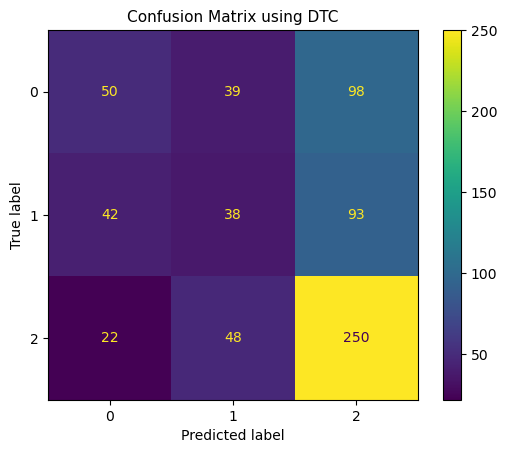

In [373]:
# decision tree classifier with depth 8 (hasil eksperimen)
dtc = DecisionTreeClassifier(max_depth=8, random_state=42)
dtc.fit(X_train_clf, y_train_clf)

# predict decision tree classifier
dtc_predict_train = dtc.predict(X_train_clf)
dtc_predict = dtc.predict(X_test_clf)

# confusion matrix for decision tree classifier
cm = confusion_matrix(y_test_clf, dtc_predict, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.title('Confusion Matrix using DTC', fontsize=11)
plt.show()

In [374]:
# evaluation metrics for decision tree classifier
eval(y_test_clf, dtc_predict, y_train_clf, dtc_predict_train)

Accuracy (train)	: 0.4970588235294118
Accuracy (test)		: 0.5581737849779087

Further information:
              precision    recall  f1-score   support

           0      0.439     0.267     0.332       187
           1      0.304     0.220     0.255       173
           2      0.567     0.781     0.657       320

    accuracy                          0.497       680
   macro avg      0.436     0.423     0.415       680
weighted avg      0.465     0.497     0.465       680



### Random Forest Classifier

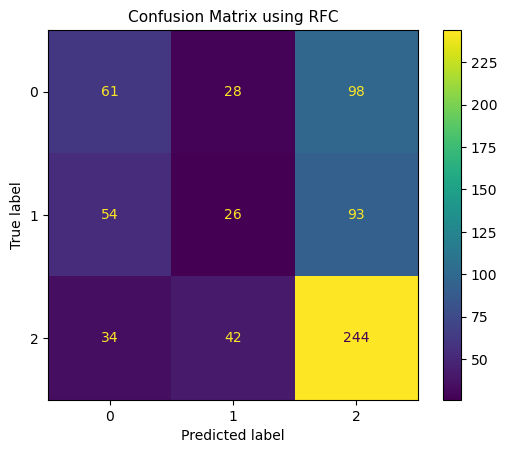

In [375]:
# random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clf, y_train_clf)

# predict random forest classifier
rfc_predict_train = rfc.predict(X_train_clf)
rfc_predict = rfc.predict(X_test_clf)

# confusion matrix for decision tree classifier
cm = confusion_matrix(y_test_clf, rfc_predict, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.title('Confusion Matrix using RFC', fontsize=11)
plt.show()

In [376]:
# evaluation metrics for random forest classifier
eval(y_test_clf, rfc_predict, y_train_clf, rfc_predict_train)

Accuracy (train)	: 0.48676470588235293
Accuracy (test)		: 0.5743740795287187

Further information:
              precision    recall  f1-score   support

           0      0.409     0.326     0.363       187
           1      0.271     0.150     0.193       173
           2      0.561     0.762     0.646       320

    accuracy                          0.487       680
   macro avg      0.414     0.413     0.401       680
weighted avg      0.445     0.487     0.453       680



In [377]:
# optimization random forest classifier with gridsearch cv
rf_model = RandomForestClassifier()
rf_params = {'criterion': ['gini','entropy'],
              'max_depth' : [5,8,10],
              'max_features': ['auto','log2'],
              'min_samples_leaf': [1,2,3,4],
              'min_samples_split': [2,4,6,8],
              'n_estimators': [90,100,115,130]
              }
rfclf = GridSearchCV(rf_model,
                     rf_params,
                     cv=5,
                     verbose=1
                    )
rfclf.fit(X_train_clf, y_train_clf)
print()
print("Best parameters set found on development set:")
print(rfclf.best_params_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits

Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 90}


In [378]:
# predict random forest classifier with optimization
best_rfc = RandomForestClassifier(**rfclf.best_params_)
best_rfc.fit(X_train_clf, y_train_clf)
best_rfc_pred_train = best_rfc.predict(X_train_clf)
best_rfc_pred = best_rfc.predict(X_test_clf)

# evaluation metrics for random forest classifier
eval(y_test_clf, best_rfc_pred, y_train_clf, best_rfc_pred_train)

Accuracy (train)	: 0.5117647058823529
Accuracy (test)		: 0.53240058910162

Further information:
              precision    recall  f1-score   support

           0      0.388     0.332     0.357       187
           1      0.500     0.017     0.034       173
           2      0.551     0.884     0.679       320

    accuracy                          0.512       680
   macro avg      0.479     0.411     0.357       680
weighted avg      0.493     0.512     0.426       680



`Keterangan`: Dapat dilihat dari ketiga model di atas, model yang cukup memiliki nilai terbaik adalah Random Forest meskipun terlihat sedikit underfit. Hal ini terjadi karena model ini merupakan model Ensemble yaitu bagging yang cara kerjanya adalah membuat banyak tree untuk meminimalkan variansi (mencegah overfit).

##### 2b. Regression

#### Feature selection

In [475]:
rent_reg = rent_final[list_num]

In [476]:
# one hot encoding for features
for i in list_cat2:
    ohe = pd.get_dummies(rent_final[i], prefix=i, drop_first=True)
    rent_reg = rent_reg.join(ohe)

<Axes: >

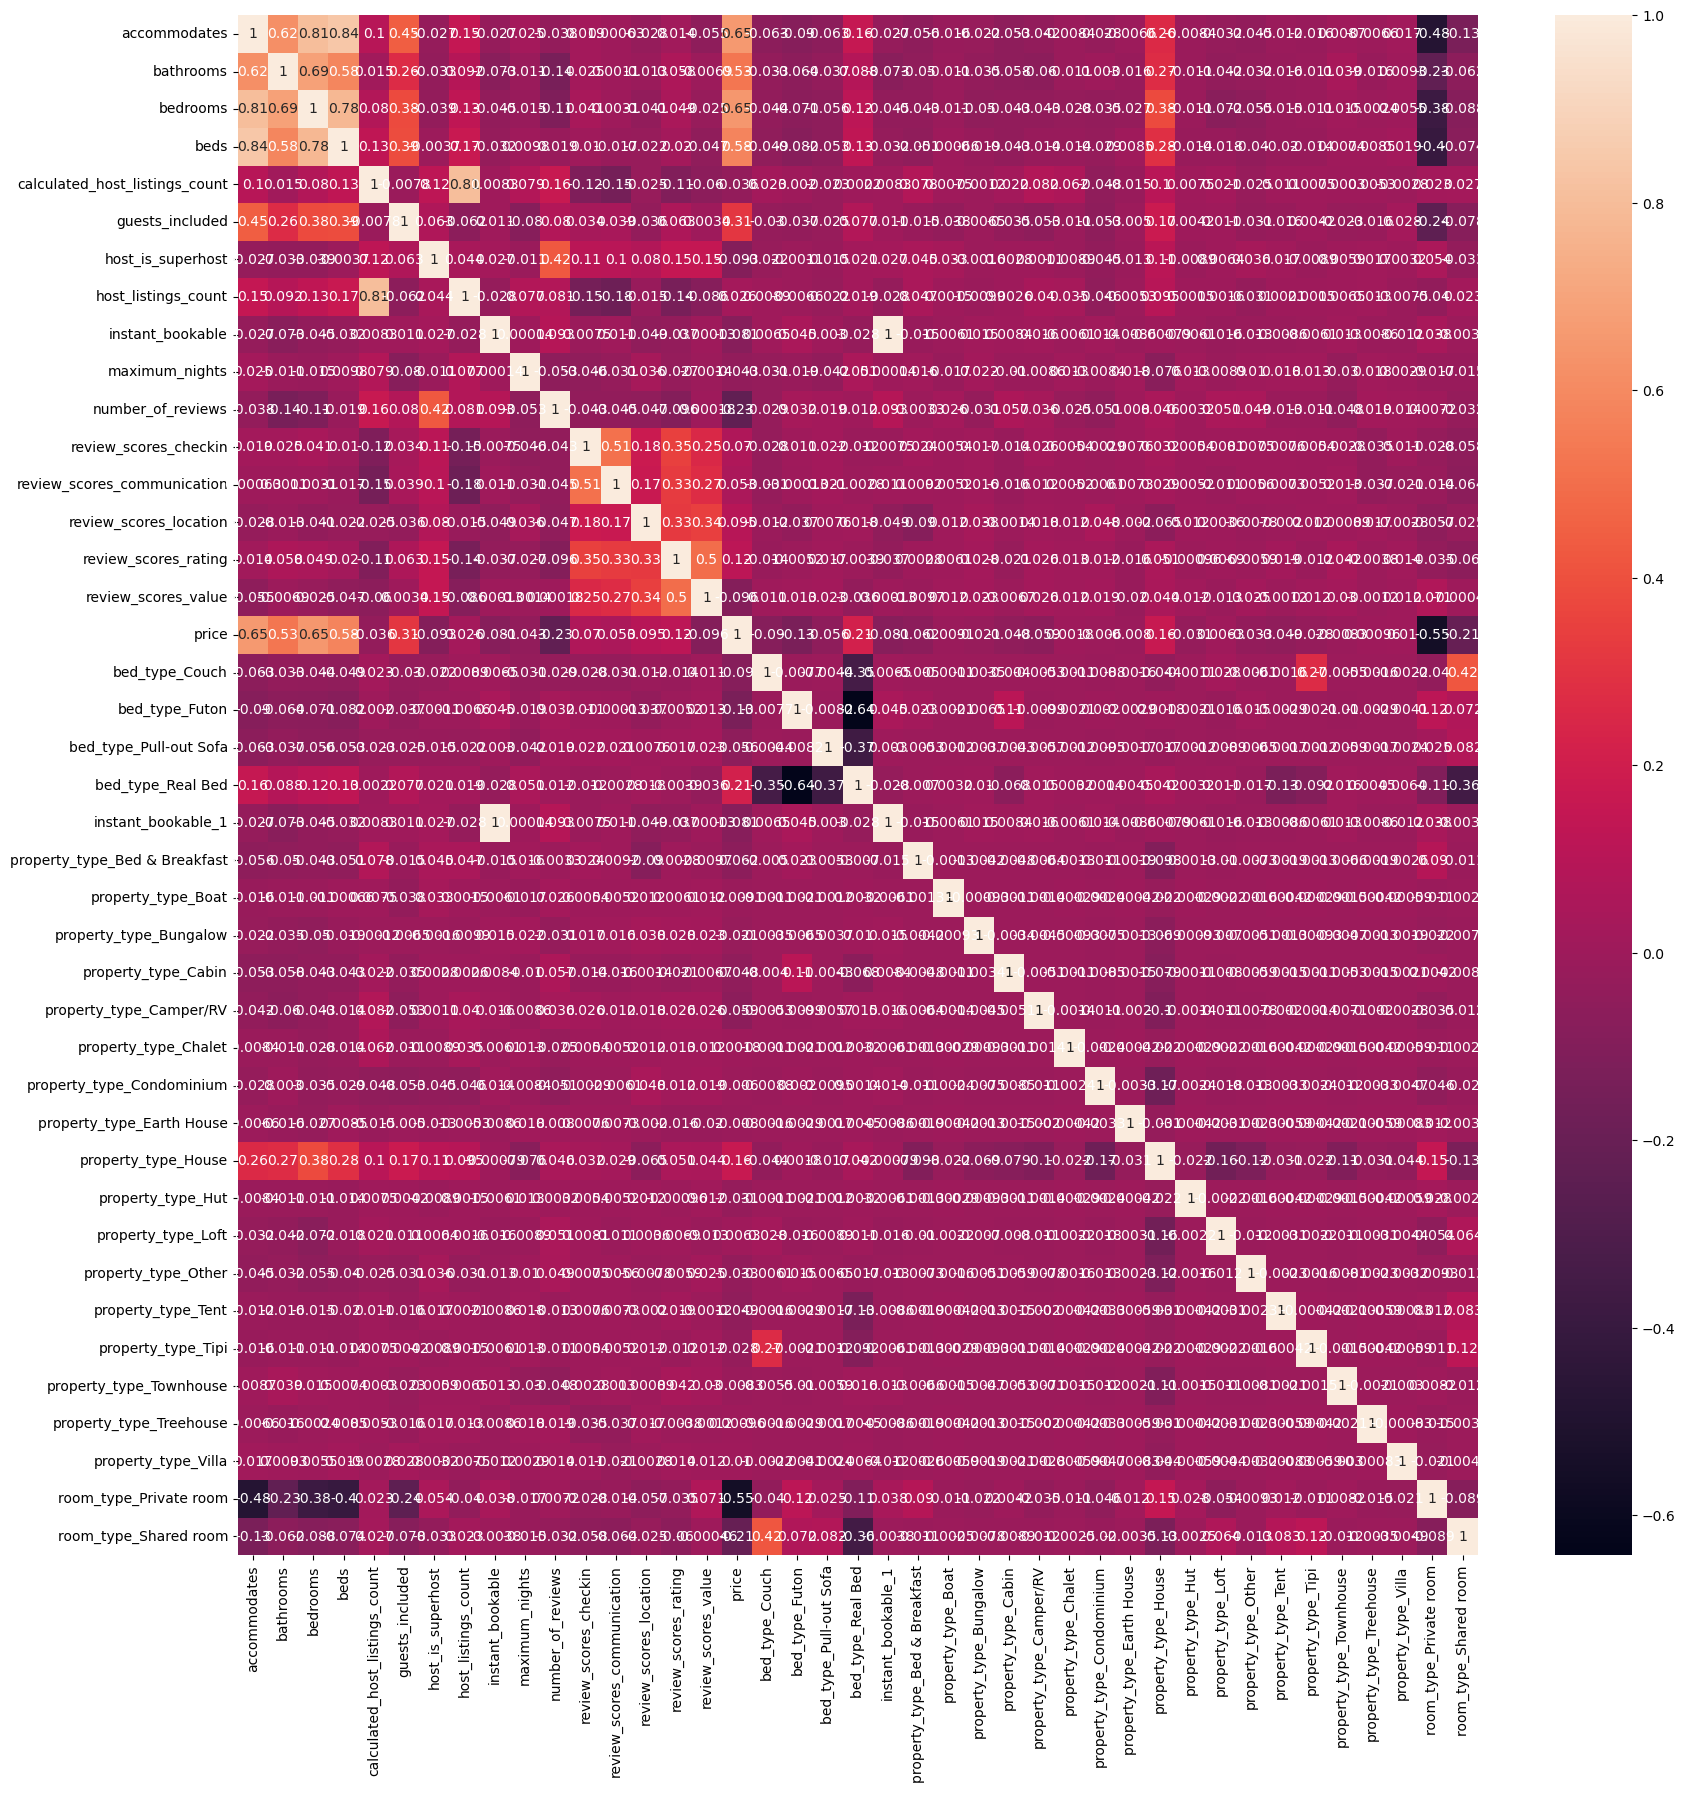

In [479]:
plt.figure(figsize=(20,20))
sns.heatmap(rent_reg.corr(), annot=True)

In [683]:
# split feature and target based on high correlation but beware multicolinearity
X_reg = rent_reg[['accommodates', 'bathrooms', 'guests_included']]
y_reg = rent_final['price']

In [684]:
# split train test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [724]:
def eval_reg(ytest, ypred, ytrain, ytrainpred):
    print('R2_score (train): {}'.format(r2_score(ytest, ypred)))
    print('R2_score (test): {}'.format(r2_score(ytrain, ytrainpred)))

### Linear Regression

In [726]:
# linear regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# predict linear regression
lr_predict_train = lr.predict(X_train_reg)
lr_predict = lr.predict(X_test_reg)

# evaluation metrics for linear regression
eval_reg(y_test_reg, lr_predict, y_train_reg, lr_predict_train)

R2_score (train): 0.46376763913304286
R2_score (test): 0.44999410349948565


### Ridge Regression

In [728]:
# ridge regression
rr = Ridge(random_state=42)
rr.fit(X_train_reg, y_train_reg)

# predict ridge regression
rr_predict_train = rr.predict(X_train_reg)
rr_predict = rr.predict(X_test_reg)

# evaluation metrics for ridge regression
eval_reg(y_test_reg, rr_predict, y_train_reg, rr_predict_train)

R2_score (train): 0.46377813699041637
R2_score (test): 0.4499940158343684


### Decision Tree Regressor

In [729]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_reg, y_train_reg)

# predict decision tree regressor
dtr_predict_train = dtr.predict(X_train_reg)
dtr_predict = dtr.predict(X_test_reg)

# evaluation metrics for decision tree
eval_reg(y_test_reg, dtr_predict, y_train_reg, dtr_predict_train)

R2_score (train): 0.49290283318400585
R2_score (test): 0.5490733566341831


### Random Forest Regressor

In [730]:
# rendom forest regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_reg, y_train_reg)

# predict random forest regressor
rfr_predict_train = rfr.predict(X_train_reg)
rfr_predict = rfr.predict(X_test_reg)

# evaluation metrics for random forest regressor
eval_reg(y_test_reg, rfr_predict, y_train_reg, rfr_predict_train)

R2_score (train): 0.505118090175651
R2_score (test): 0.5478734678228503


In [718]:
# optimization random forest regressor with gridsearch cv
rfr_model = RandomForestRegressor()
rfr_params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
              'max_depth' : [1,4,8,10],
              'min_samples_split': [2,3,4,5]
              }
rfrreg = GridSearchCV(rfr_model,
                     rfr_params,
                     cv=5,
                     verbose=1
                    )
rfrreg.fit(X_train_reg, y_train_reg)
print()
print("Best parameters set found on development set:")
print(rfrreg.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters set found on development set:
{'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_split': 5}


In [731]:
# predict random forest regressor with optimization
best_rfr = RandomForestRegressor(**rfrreg.best_params_)
best_rfr.fit(X_train_reg, y_train_reg)
best_rfr_pred_train = best_rfr.predict(X_train_reg)
best_rfr_pred = best_rfr.predict(X_test_reg)

# evaluation metrics for random forest regressor after optimization
eval_reg(y_test_reg, best_rfr_pred, y_train_reg, best_rfr_pred_train)

R2_score (train): 0.5094141973381792
R2_score (test): 0.5442733967504605


`Keterangan`: dapat dilihat bahwa model linear biasa memiliki nilai R2 yang cukup bagus, tidak overfit/underfit, namun nilai tersebut termasuk kecil apabila dibandingkan dengan R2 pada model tree. Model tree pada kasus ini terjadi underfit, dengan demikian di bawah ini akan dilakukan model boosting.

In [736]:
# Boosting
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

# adaboost
abr = AdaBoostRegressor(n_estimators=50, learning_rate=1)
abr.fit(X_train_reg, y_train_reg)

# gradient boosting
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_reg, y_train_reg)

# xgboost
xg = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
xg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [737]:
# predict
abr_pred_train = abr.predict(X_train_reg)
abr_pred = abr.predict(X_test_reg)

gbr_pred_train = gbr.predict(X_train_reg)
gbr_pred = gbr.predict(X_test_reg)

xg_pred_train = xg.predict(X_train_reg)
xg_pred = xg.predict(X_test_reg)

eval_reg(y_test_reg, abr_pred, y_train_reg, abr_pred_train)
eval_reg(y_test_reg, gbr_pred, y_train_reg, gbr_pred_train)
eval_reg(y_test_reg, xg_pred, y_train_reg, xg_pred_train)

R2_score (train): 0.5020738963542971
R2_score (test): 0.49535728678806545
R2_score (train): 0.5198611482877019
R2_score (test): 0.5363732242993758
R2_score (train): 0.5203684068690555
R2_score (test): 0.5362035265640015


`Keterangan`: setelah melakukan boosting, dapat dilihat bahwa ketiga model memiliki nilai yang hampir serupa. Namun, yang menjadi poin acuan adalah model AdaBoost karena nilai R2 train > R2 test terlihat cukup normal (tidak overfit/underfit).

# 2c. Clustering

#### Encoding and Normalization

In [791]:
# copy last dataframe
rent_cls = rent_final.copy()
num_of_reviews = np.exp(rent_final['number_of_reviews'])

In [792]:
# make new feature containing the average of all reviews
rent_cls['review_average'] = sum([rent_cls['review_scores_checkin'], rent_cls['review_scores_communication'], rent_cls['review_scores_location'], rent_cls['review_scores_rating'], rent_cls['review_scores_value']])/len(review)
rent_cls['number_of_reviews'] = num_of_reviews

In [793]:
rent_cls.head()

accommodates  bathrooms  bedrooms  beds  host_is_superhost  \
0              6          2         1     3                  0   
7              2          1         1     1                  0   
9              2          1         1     1                  1   
11             2          1         1     1                  0   
12             2          1         1     1                  1   

    review_scores_checkin  review_scores_communication  \
0                    10.0                         10.0   
7                    10.0                         10.0   
9                    10.0                         10.0   
11                   10.0                         10.0   
12                   10.0                         10.0   

    review_scores_location  review_scores_rating  review_scores_value  ...  \
0                     10.0                  10.0                 10.0  ...   
7                     10.0                  10.0                 10.0  ...   
9                     10.0                   9.9                 10.0  ...   
11                    10.0                   9.3                 10.0  ...   
12                    10.0                  10.0                 10.0  ...   

    guests_included  host_listings_count  maximum_nights  number_of_reviews  \
0          0.693147             0.000000        2.302585                1.0   
7          1.098612             0.000000        1.945910                2.0   
9          1.098612             0.000000        7.025538               20.0   
11         0.693147             0.000000        7.025538                9.0   
12         0.693147             2.197225        2.639057                4.0   

       price  bed_type  cancellation_policy property_type     room_type  \
0   5.703782  Real Bed             moderate         House  Private room   
7   3.688879  Real Bed             moderate         House  Private room   
9   3.784190  Real Bed             moderate         House  Private room   
11  3.912023  Real Bed               strict         House  Private room   
12  3.891820  Real Bed               strict         House  Private room   

   review_average  
0           10.00  
7           10.00  
9            9.98  
11           9.86  
12          10.00  

[5 rows x 22 columns]

In [794]:
# choose some features to be clustered
X = rent_cls[['number_of_reviews','review_average']]

In [795]:
# normalization
scaler_cls = StandardScaler()
scaler_cls.fit(X)
rent_cls_scaled = scaler_cls.transform(X)
new_rent = pd.DataFrame(rent_cls_scaled, columns=X.columns)

In [796]:
new_rent.head()

number_of_reviews  review_average
0          -0.538515        0.901212
1          -0.506443        0.901212
2           0.070859        0.839488
3          -0.281936        0.469145
4          -0.442298        0.901212

#### Find best k value

For n_clusters = 2 The average silhouette_coefficient is : 0.49599119426821786
For n_clusters = 3 The average silhouette_coefficient is : 0.5450943102452963
For n_clusters = 4 The average silhouette_coefficient is : 0.4905442414835066
For n_clusters = 5 The average silhouette_coefficient is : 0.5193853141727466


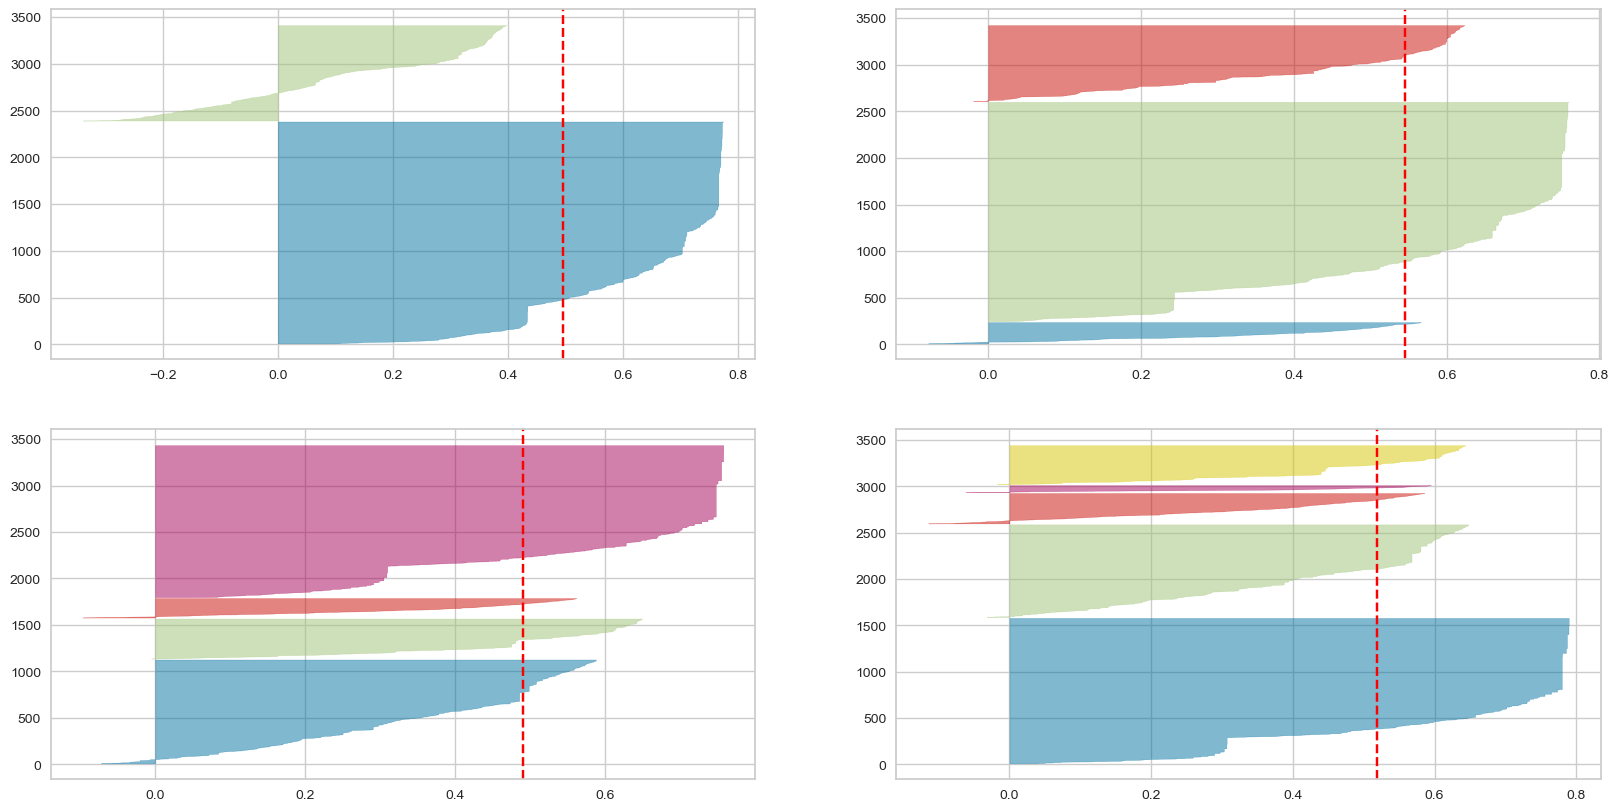

In [797]:
# Silhouette
fig, ax = plt.subplots(2, 2, figsize=(20,10))
for k in [2, 3, 4, 5]:
    cluster = KMeans(n_clusters = k)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(cluster, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new_rent)

    cluster_labels = cluster.fit_predict(new_rent)
    silhouette_avg = silhouette_score(new_rent, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

`Keterangan`: berdasarkan gambar di atas dapat dilihat bahwa jumlah cluster yang paling cocok adalah 3 dengan nilai 0.54

### K-Means Clustering

In [798]:
# copy dataframe to interpret original data for clustered dataframe
res = X.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
cls = kmeans.fit_predict(new_rent)
res["cluster"] = cls

In [799]:
res.head()

number_of_reviews  review_average  cluster
0                 1.0           10.00        0
7                 2.0           10.00        0
9                20.0            9.98        0
11                9.0            9.86        0
12                4.0           10.00        0

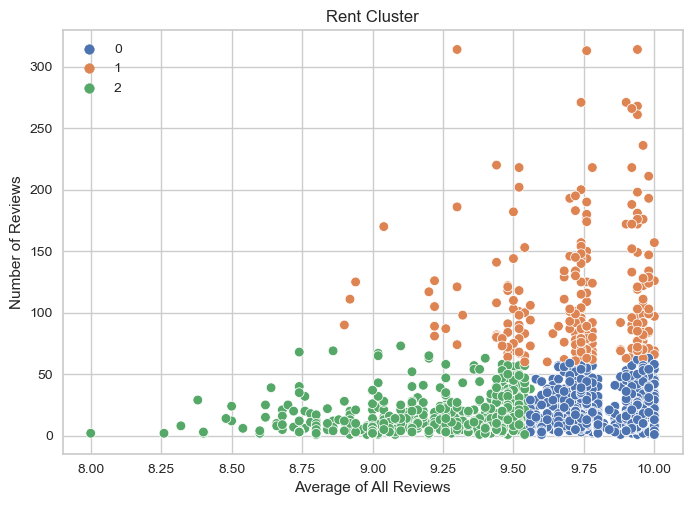

In [800]:
# plot the cluster
sns.scatterplot(data=res, x='review_average', y='number_of_reviews', hue=kmeans.labels_, palette='deep')
plt.title("Rent Cluster")
plt.xlabel('Average of All Reviews')
plt.ylabel('Number of Reviews')
plt.show()

`Keterangan`: berdasarkan gambar di atas, dapat diambil beberapa informasi yaitu:
- Klaster biru merupakan klaster dengan rata-rata review sangat baik namun masih sedikit orang yang memberikan review. Melalui hal tersebut dapat dilakukan pengiklanan untuk mempromosikan beberapa rumah sehingga banyak orang yang tahu dan jumlah review menjadi meningkat.
- Klaster hijau merupakan klaster dengan rata-rata rating cukup baik namun tidak banyak orang yang tahu. Melalui hal tersebut dapat dilakukan pengiklanan untuk mempromosikan rumah yang akan disewa dan perlu meningkatkan pelayanan.
- Klaster orange merupakan klaster akomodasi dengan rata-rata rating sangat baik dan banyak orang yang tahu sehingga hanya perlu melakukan peningkatan pelayanan agar semakin banyak orang yang ingin menyewa.